In [211]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


In [212]:
base = pd.read_csv('train.csv')
base

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [213]:
def verifyNull():
  null_data = base.isnull().sum()
  print("Total: ", len(null_data))
  print("Total de colunas com info nulls: ", len(null_data[null_data>0]))
  return null_data[null_data>0]
verifyNull()

Total:  81
Total de colunas com info nulls:  19


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [214]:

numerical_cols = base.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = base.select_dtypes(include=['object']).columns


imputer_median = SimpleImputer(strategy='median')
base[numerical_cols] = imputer_median.fit_transform(base[numerical_cols])


imputer_most = SimpleImputer(strategy='most_frequent')
base[categorical_cols] = imputer_most.fit_transform(base[categorical_cols])


In [215]:
verifyNull()

Total:  81
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [216]:
prevision = base.iloc[:, 0:len(base.columns) - 1].values
classe = base.iloc[:, len(base.columns) - 1].values.astype(float)
classe


array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [217]:
def encode_categorical_columns(data):
    n_cols = data.shape[1]
    for col in range(n_cols):
        if isinstance(data[:, col][0], str): 
            labelEncoder = LabelEncoder()
            data[:, col] = labelEncoder.fit_transform(data[:, col])
        else: 
            data[:, col] = pd.to_numeric(data[:, col], errors='coerce')
    for col in range(n_cols):
        if np.any(pd.isnull(data[:, col])): 
            print(col)
            mean_value = np.nanmean(data[:, col].astype(float))
            data[:, col] = np.where(pd.isnull(data[:, col]), mean_value, data[:, col])
    # Convert data to float after encoding
    data = data.astype(float)
    return data

prevision = encode_categorical_columns(prevision)

prevision

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00]])

In [218]:
scale = StandardScaler()
prevision = scale.fit_transform(prevision)
prevision

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276, -0.04553194, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [219]:
x_train, x_test, y_train, y_test = train_test_split(prevision, classe, random_state=0, test_size=0.3)

In [220]:

modelo = LinearRegression()
modelo = modelo.fit(x_train, y_train)
modelo

LinearRegression()

In [221]:
modelo.intercept_ + modelo.coef_ * x_test

array([[180659.08550301, 185127.61636422, 180689.80503463, ...,
        181762.95889667, 180143.42497255, 174010.77488257],
       [180657.93596324, 181499.32622024, 180689.80503463, ...,
        183108.71856578, 180143.42497255, 181527.51677399],
       [180656.96792975, 181499.32622024, 180689.80503463, ...,
        179071.43955843, 180143.42497255, 181527.51677399],
       ...,
       [180662.86688381, 185127.61636422, 180689.80503463, ...,
        180417.19922755, 180143.42497255, 181527.51677399],
       [180681.80403889, 185127.61636422, 180689.80503463, ...,
        179071.43955843, 180143.42497255, 181527.51677399],
       [180670.24813914, 185127.61636422, 180689.80503463, ...,
        177725.67988931, 182286.09659926, 185285.8877197 ]])

In [223]:
prevision = modelo.predict(x_test)
prevision

array([ 215801.15083782,  178547.15083782,  104381.15083782,
        218410.15083782,   92587.15083782,   81347.15083782,
        236290.15083782,  140236.40083782,  433885.15083782,
        157377.15083782,  198649.15083782,  -70878.84916218,
        241975.15083782,  110321.15083782,  122818.15083782,
        136665.15083782,  232335.15083782,  111683.15083782,
        132685.15083782,  182828.15083782,  138655.15083782,
        162589.15083782,   71065.15083782,  149920.15083782,
        205447.15083782,  198933.65083782,  172785.15083782,
         60857.15083782,  350210.15083782,  110841.15083782,
        138409.15083782,  220491.15083782,  146393.15083782,
        282158.15083782,  314249.15083782,  186441.15083782,
        306743.65083782,  108667.15083782,  227840.15083782,
        342145.65083782,  215405.15083782,   90957.15083782,
        202373.15083782,  296849.15083782,  332905.15083782,
        132197.15083782, -151794.84916218,  115993.15083782,
        175673.15083782,

In [224]:

mse = mean_squared_error(y_test, prevision)
r2 = r2_score(y_test, prevision)
print(r2)
print(mse)


0.6483424376285708
2387400181.089571


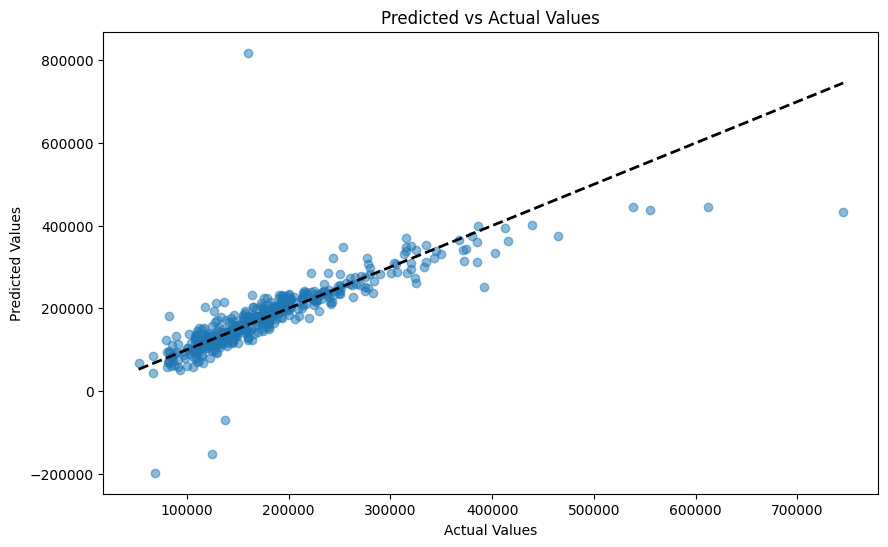

In [225]:

# Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prevision, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

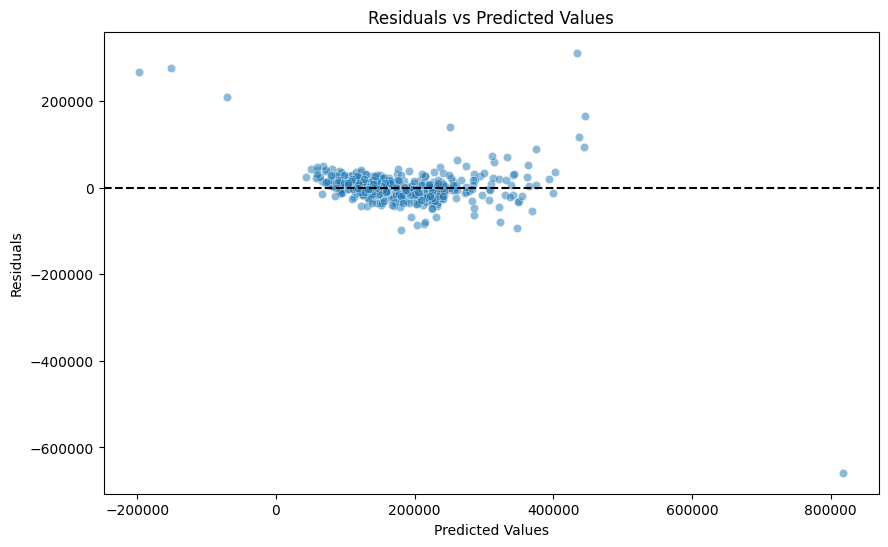

In [226]:
# Residual Plot
residuals = y_test - prevision

plt.figure(figsize=(10, 6))
sns.scatterplot(x=prevision, y=residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [227]:
testData = pd.read_csv('test.csv')
testData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [228]:

numerical_cols = base.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = base.select_dtypes(include=['object']).columns


imputer_median = SimpleImputer(strategy='median')
testData[numerical_cols] = imputer_median.fit_transform(testData[numerical_cols])


imputer_most = SimpleImputer(strategy='most_frequent')
testData[categorical_cols] = imputer_most.fit_transform(testData[categorical_cols])


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [229]:
def verifyNull():
  null_data = testData.isnull().sum()
  print("Total: ", len(null_data))
  print("Total de colunas com info nulls: ", len(null_data[null_data>0]))
  return null_data[null_data>0]
verifyNull()

Total:  80
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [230]:
newData = testData.iloc[:, 0:len(testData) - 1].values
newData = encode_categorical_columns(newData)
newData = scale.fit_transform(newData)
newData

3


array([[-1.73086406, -0.87471081, -1.50177721, ...,  1.71390537,
         0.32475004,  0.20138321],
       [-1.72848977, -0.87471081, -0.03909834, ...,  1.71390537,
         0.32475004,  0.20138321],
       [-1.72611547,  0.06135085, -0.03909834, ...,  1.71390537,
         0.32475004,  0.20138321],
       ...,
       [ 1.72611547, -0.87471081, -0.03909834, ..., -1.35995811,
         0.32475004, -3.58981811],
       [ 1.72848977,  0.64638939, -0.03909834, ..., -1.35995811,
         0.32475004,  0.20138321],
       [ 1.73086406,  0.06135085, -0.03909834, ..., -1.35995811,
         0.32475004,  0.20138321]])

In [231]:
newPrevision = modelo.predict(newData)
newPrevision

array([-5.35775610e+14, -9.03352224e+13, -1.65016131e+14, ...,
       -1.97958117e+14, -7.87420160e+14,  2.10430930e+14])

In [232]:
sample_submission_df = pd.read_csv('sample_submission.csv')
output = pd.DataFrame({'Id': sample_submission_df.Id, 'SalePrice': newPrevision})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
